In [253]:
import numpy as np
import matplotlib.pyplot as plt

In [254]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    return sigm(z)*(1.0 - sigm(z))

In [276]:
class Problem3:
    def __init__(self, nr_input_neurons, nr_hidden_neruons, nr_output_neruons):
        self.nr_input_neurons = nr_input_neurons
        self.nr_output_neruons =nr_output_neruons

        # Gender:         Male = 0, Female = 1
        # Car Ownership = 0,1,2
        # Travel Cost:    0 = low, 1 = medium, 2 = high
        # Income Level =  0 = bus, 1 = train,  2 = car
        self.train_inputs = np.array([ [0,0,0,0], [0,1,0,1], [1,1,0,1], [1,0,0,1], [0,1,0,1],
                                     [0,0,1,1], [1,1,1,1], [1,1,2,2], [0,2,2,1], [1,2,2,2] ])
        # bus = [1,0,0] train = [0,1,0] car = [0,0,1]
        self.train_target_output = np.array([ [1,0,0],[1,0,0],[0,1,0],[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1]])

        np.random.seed(13)

        # hidden layer of n neurons and i inputs
        self.w2 = np.random.randn(nr_hidden_neruons,nr_input_neurons)
        self.b2 = np.random.randn(nr_hidden_neruons,1)

        # output layer of n neuron and i inputs
        self.w3 = np.random.randn(nr_output_neruons,nr_hidden_neruons)
        self.b3 = np.random.randn(nr_output_neruons,1)

    def feedforward(self, inputs):
        # here we muplitply the weight by the input and add the bias to it
        neurons_layer2 = sigm(self.w2.dot(inputs) + self.b2)
        neurons_layer3 = sigm(self.w3.dot(neurons_layer2) + self.b3)
        
        return neurons_layer3 # we return the output
    
    def predict(self, input):
        lay3 = self.feedforward(input)
        ans = []
        # print("\n prediction: ", lay3, "Shape: ", lay3.shape)
        for i in range(self.nr_output_neruons):
            if lay3[i] >= 0.5:
                ans.append([1])
            else: ans.append([0])
        return ans

    def backprop(self, inputs, target_output):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)

        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0

        # zip allows you to iterate two lists at the same time
        # letters = ['a', 'b', 'c'] & numbers = [1, 2, 3]
        # a -> 1, b -> 2, c -> 3
        for x, y in zip(inputs, target_output):
            a1 = x.reshape(self.nr_input_neurons,1)     
            # feedforward propagation
            z2 = self.w2.dot(a1) + self.b2      
            a2 = sigm(z2)                        

            z3 = self.w3.dot(a2) + self.b3       
            a3 = sigm(z3)    

            y = y.reshape(self.nr_output_neruons,1)  # convert the output vector y into a n_output_neuron ,1 column since it has  neurons                   

            # cross-entropy cost function
            # (basic backpropagation formula, opposite of feedforward)
            delta3 = (a3-y) #* sigm_deriv(z3)                
            delta2= sigm_deriv(z2) * self.w3.T.dot(delta3)    

            del_w3 += delta3.dot(a2.T)            
            del_b3 += delta3
               
            del_w2 += delta2.dot(a1.T)      
            del_b2 += delta2

            # cost += ((a3-y)**2).sum()
            # mean error cost function improves the learning speed
            cost -=  np.sum(y*np.log(a3) + (1-y)*np.log(1-a3))
        n = len(target_output)  # number of training vectors           
        # get the average change per training input
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n 

    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_target_output
        cost = np.zeros((epochs,))
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3

        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.plot(cost)
        return cost   


First set:  [[0.10847134 0.05664833 0.053289   0.09758239 0.05664833 0.10736918
  0.0684745  0.09652212 0.07575399 0.09265075]
 [0.90565037 0.95744745 0.94626028 0.92473323 0.95744745 0.94685256
  0.94868749 0.95467474 0.96401819 0.96026671]
 [0.24693203 0.47696612 0.32128334 0.21919701 0.47696612 0.38245241
  0.34864983 0.41917457 0.50572272 0.46443156]]
Final set:  [[9.99558966e-01 9.97419231e-01 5.87425846e-03 9.97461381e-01
  9.97419231e-01 2.61169649e-03 8.68836715e-05 1.20160764e-05
  1.56640296e-05 1.00743618e-05]
 [1.87163713e-03 3.11452745e-04 9.95581753e-01 6.30037100e-03
  3.11452745e-04 9.95321404e-01 9.95175245e-01 4.64966992e-03
  1.56010162e-03 1.22686807e-03]
 [1.41043524e-05 3.57063732e-04 1.95611671e-04 2.20969857e-05
  3.57063732e-04 1.06643006e-03 3.75404422e-03 9.96984345e-01
  9.98759479e-01 9.98985083e-01]]
bus: 1-0-0, train: 0-1-0, car: 0-0-1

100:  [[1], [0], [0]]
010:  [[0], [1], [0]]
001:  [[0], [0], [1]]

  Female without car ownership, willing to pay expens

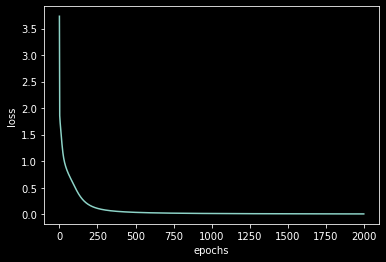

In [278]:
# Train for problem3
problem3 = Problem3(4,5,3)
xs = problem3.train_inputs.T
print("First set: ",problem3.feedforward(xs))

epochs = 2000
trainSet = problem3.train(epochs, 1.0)
print("Final set: ",problem3.feedforward(xs))

print("bus: 1-0-0, train: 0-1-0, car: 0-0-1\n")
print("100: ",problem3.predict(np.array([[0],[0],[0],[0]])))
# print("100: ",problem3.predict(np.array([0,0,0,0])))
print("010: ",problem3.predict(np.array([[1],[1],[0],[1]])))
print("001: ",problem3.predict(np.array([[1],[2],[2],[2]])))
print("\n  Female without car ownership, willing to pay expensive travel cost and having medium income level ")
print(problem3.predict(np.array([[1],[0],[2],[1]])))
